<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1: IAKIMOVA Iuliia </b> 

 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

n1_1 = x1*w1_11 + x2*w1_21 + w1_01
o1_1 = sigmoid(n1_1) # Output of the green neuron
n1_2 = x1*w1_12 + x2*w1_22 + w1_02
o1_2 = sigmoid(n1_2)# Output of the red neuron
n2_1 = o1_1*w2_11 + o1_2*w2_21 + w2_01 
o2_1 = sigmoid(n2_1)# Output of the black neuron


print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = 2*(o2_1-y) * dsigmoid(n2_1)
dL_w2_11 = 2*(o2_1-y) * dsigmoid(n2_1) * o1_1
dL_w2_21 = 2*(o2_1-y) * dsigmoid(n2_1) * o1_2

# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = (2*((o2_1-y) * dsigmoid(n2_1)) * w2_11) * dsigmoid(n1_1)
dL_w1_11 = (2*((o2_1-y) * dsigmoid(n2_1)) * w2_11) * dsigmoid(n1_1) * x1
dL_w1_21 = (2*((o2_1-y) * dsigmoid(n2_1)) * w2_11) * dsigmoid(n1_1) * x2
dL_w1_02 = (2*((o2_1-y) * dsigmoid(n2_1)) * w2_21) * dsigmoid(n1_2)
dL_w1_12 = (2*((o2_1-y) * dsigmoid(n2_1)) * w2_21) * dsigmoid(n1_2) * x1
dL_w1_22 = (2*((o2_1-y) * dsigmoid(n2_1)) * w2_21) * dsigmoid(n1_2) * x2

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = sigmoid(x1*w1_11 + x2*w1_21 + w1_01)
o1_2 = sigmoid(x1*w1_12 + x2*w1_22 + w1_02)
o2_1 = sigmoid(o1_1*w2_11 + o1_2*w2_21 + w2_01)

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)


=== FORWARD PASS 1 ===
o = 0.5597295991095776
=== BACKWARD PASS ===
w1_01 = 0.2540331790269339
w1_11 = 0.3432265432215471
w1_21 = 0.8108066358053868
w1_02 = -0.4341841377344243
w1_12 = -0.5273473101875394
w1_22 = 0.19316317245311515
w2_01 = 0.10637455535192786
w2_11 = -0.8541467506279605
w2_21 = 0.2745727217772572
=== FORWARD PASS 2 ===
o = 0.40648823589210104


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):

        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        
        u_1 = np.dot(inputs, self.W_input_to_hidden) # Compute activations for the hidden layer
             # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        self.o_hidden[:, :-1] =sigmoid(u_1)# Compute output of hidden layer
        u_2 = np.dot(self.o_hidden, self.W_hidden_to_output) # Compute activations for the output layer
        self.u_output = u_2
        self.o_output = sigmoid(u_2) # Compute output of output layer

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2, hidden_layer_size=2, output_layer_size=1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [14]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        l = learning_rate
        targets = np.array(targets) # Target outputs

        # partial derivative of loss with respect to activations of output layer
        self.dL_du_output = (self.o_output - targets) * dsigmoid(self.u_output) 
        T = np.transpose(np.array(self.u_hidden))
        
        # partial derivative of loss with respect to activations of hidden layer
        self.dL_du_hidden = np.dot(self.dL_du_output, np.transpose(self.W_hidden_to_output[:-1])) 
        self.dL_du_hidden = np.multiply( np.transpose(self.dL_du_hidden), dsigmoid(T))
        
        # Compute partial derivative of loss with respect to weights 
        dW_input_to_hidden = 2*np.dot(self.dL_du_hidden, self.input)
        dW_hidden_to_output = 2*np.dot(np.transpose(self.dL_du_output), self.o_hidden)
        
        # Make updates
        self.W_hidden_to_output -= l*np.transpose(dW_hidden_to_output)/len(targets)
        self.W_input_to_hidden -= l*np.transpose(dW_input_to_hidden)/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [15]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2, hidden_layer_size=2, output_layer_size=1)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [16]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


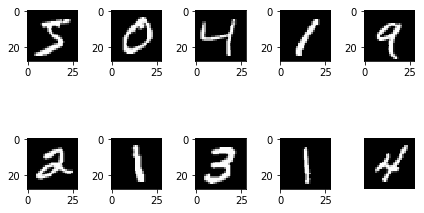

In [17]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [43]:
# Define your neural network
mnist_model = NeuralNetwork(784, 30, 10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Learning rate 0.1
Test accuracy 10.28
Training time: 32.9686803817749


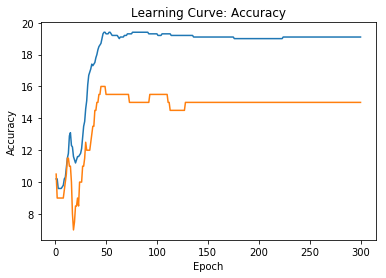


 Learning rate 1
Test accuracy 18.18
Training time: 32.73236918449402


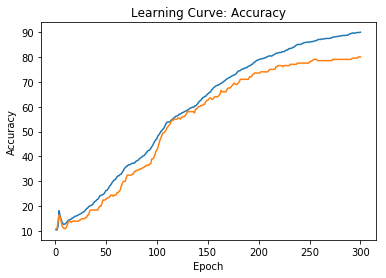


 Learning rate 10
Test accuracy 83.83
Training time: 32.826375007629395


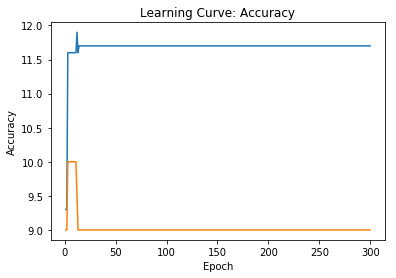

In [46]:
# Train NN and print accuracy on test data

# Learning rate 0.1
print('Learning rate 0.1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 1.
print('\n Learning rate 1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 10.
print('\n Learning rate 10')
print('Test accuracy', test_accuracy)


mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=10)

test_accuracy = mnist_model.predict(test_data)/100



<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Learning rate 0.1
Test accuracy 10.32
Training time: 32.395944356918335


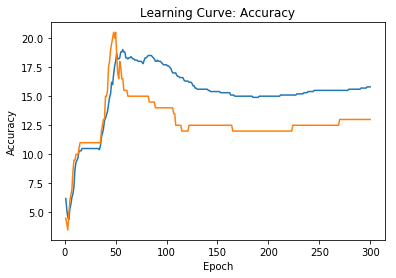


 Learning rate 1
Test accuracy 14.19
Training time: 32.214256286621094


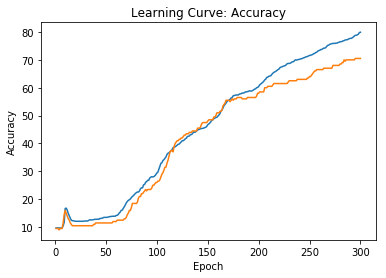


 Learning rate 10
Test accuracy 73.98
Training time: 32.1463897228241


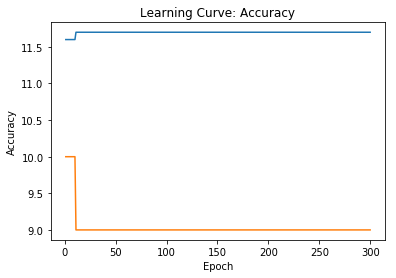

Learning rate 0.1
Test accuracy 10.28
Training time: 35.62421250343323


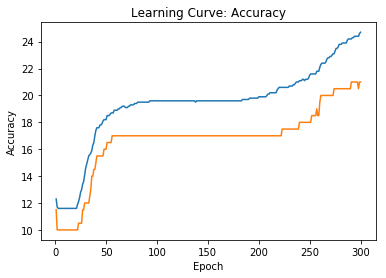


 Learning rate 1
Test accuracy 22.98
Training time: 35.75854516029358


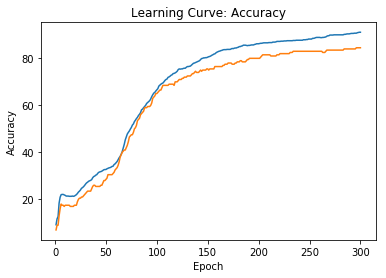


 Learning rate 10
Test accuracy 84.74
Training time: 35.68471693992615


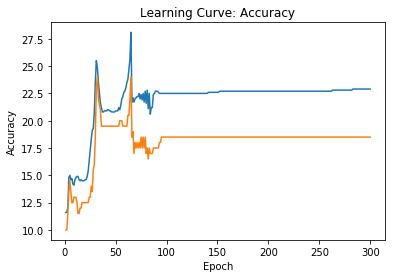

In [47]:
# 15 hidden neurons 
mnist_model = NeuralNetwork(784, 15, 10)

# Learning rate 0.1
print('Learning rate 0.1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 1.
print('\n Learning rate 1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 10.
print('\n Learning rate 10')
print('Test accuracy', test_accuracy)


mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=10)

test_accuracy = mnist_model.predict(test_data)/100


# 75 hidden neurons
mnist_model = NeuralNetwork(784, 75, 10)

# Learning rate 0.1
print('Learning rate 0.1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=0.1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 1.
print('\n Learning rate 1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 10.
print('\n Learning rate 10')
print('Test accuracy', test_accuracy)


mnist_model.weights_init()
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=10)

test_accuracy = mnist_model.predict(test_data)/100

<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Learning rate 0.1
Test accuracy 21.11
Training time: 2.748623847961426


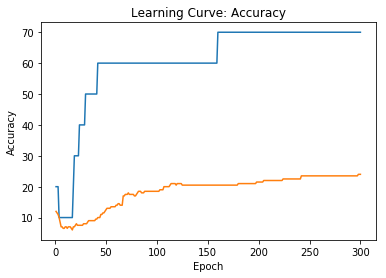


 Learning rate 1
Test accuracy 21.48
Training time: 2.702033519744873


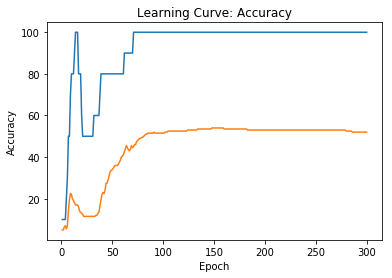


 Learning rate 10
Test accuracy 50.11
Training time: 2.717257022857666


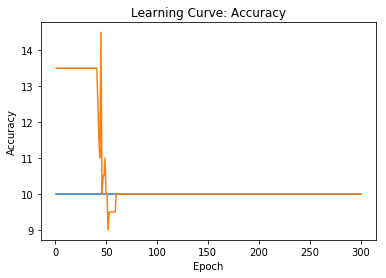

Learning rate 0.1
Test accuracy 10.1
Training time: 2.604294776916504


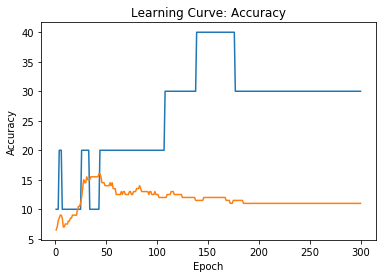


 Learning rate 1
Test accuracy 13.0
Training time: 2.6366796493530273


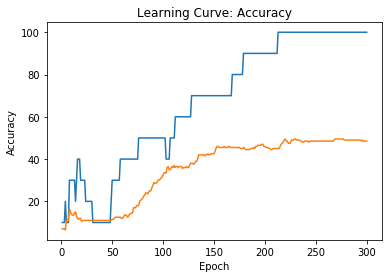


 Learning rate 10
Test accuracy 49.79
Training time: 2.5986223220825195


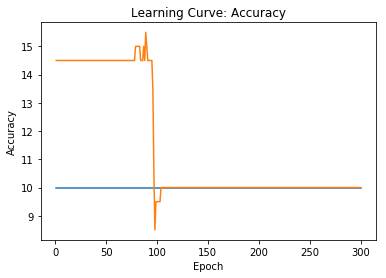

Learning rate 0.1
Test accuracy 9.54
Training time: 3.4641942977905273


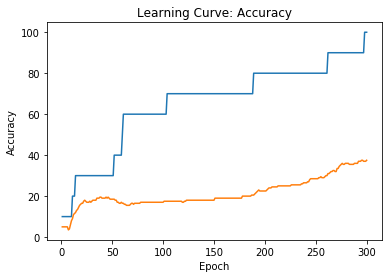


 Learning rate 1
Test accuracy 35.22
Training time: 2.9822025299072266


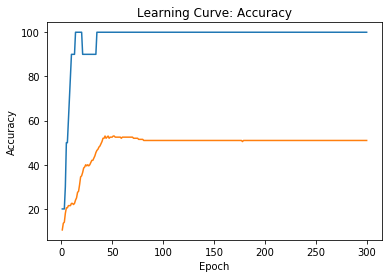


 Learning rate 10
Test accuracy 51.35
Training time: 2.996298313140869


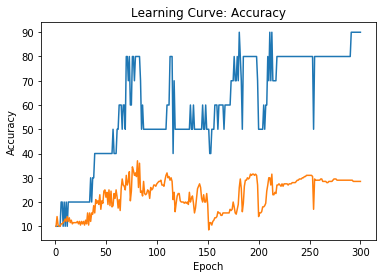

In [48]:


# 30 hidden neurons
mnist_model = NeuralNetwork(784, 30, 10)

# Learning rate 0.1
print('Learning rate 0.1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 1.
print('\n Learning rate 1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 10.
print('\n Learning rate 10')
print('Test accuracy', test_accuracy)


mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10)

test_accuracy = mnist_model.predict(test_data)/100

# 15 hidden neurons
mnist_model = NeuralNetwork(784, 15, 10)

# Learning rate 0.1
print('Learning rate 0.1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 1.
print('\n Learning rate 1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 10.
print('\n Learning rate 10')
print('Test accuracy', test_accuracy)


mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10)

test_accuracy = mnist_model.predict(test_data)/100

# 75 hidden neurons
mnist_model = NeuralNetwork(784, 75, 10)

# Learning rate 0.1
print('Learning rate 0.1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=0.1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 1.
print('\n Learning rate 1')
print('Test accuracy', test_accuracy)

mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=1)

test_accuracy = mnist_model.predict(test_data)/100


# Learning rate 10.
print('\n Learning rate 10')
print('Test accuracy', test_accuracy)


mnist_model.weights_init()
mnist_model.train(vsmall_training_data, small_validation_data, iterations=300, learning_rate=10)

test_accuracy = mnist_model.predict(test_data)/100

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer: Experimenting with a different set of hidden layers and a learning rate parameter, we can draw the following conclusion:

- Test accuracy increases with the number of hidden layers. The more hidden layers we have, the better the model predicts. However at some points with the high number of all the parameter results can turn into the overfitting.

- The learning rate with the number of 1 represents the best accuracy among the testing and validation sets. With the learning rate = 0.1 training the model results in the failure because of the slow learning and small number of iterations while with the learning rate = 10 the model steps over the minimum and face the big difference between testing and validation set

- Bigger size of the training set results in the better model accuracy.

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Answer: The NN with 75 hidden layers and larning rate=1 achives the best perfomance. Because it provides model with a detailed number of information and optimal step size in order to reach the minimum without divergent behaviour or not to reach it at all.

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 35.69802713394165


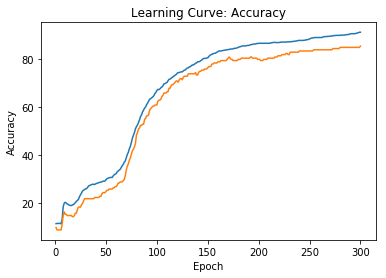

Test accuracy 85.06


In [53]:
mnist_model = NeuralNetwork(784, 75, 10)
mnist_model.train(small_training_data, small_validation_data, iterations=300, learning_rate=1)

test_accuracy = mnist_model.predict(test_data)/100
print('Test accuracy', test_accuracy)

<div align="center"><b>THE END!</b>